# Simpler Markov Chain Monte Carlo
Bayesian analysis has gained more popularity in recent years, especially in modern Machine Learning applications.  One of the greatest advantage of Bayesian Analysis is that it infers the underlying distribution (posterior) from observationns, and MCMC plays an important part in obtaining the posterior.

## Obtain posterior
Below is the famous Bayes equation:
$P(\theta | x)=\frac{P(x|\theta)\cdot P(\theta)}{P(x)}$.  
$x$ in the above equation is the data, and $P(\theta)$ is our preliminary guess of the parameters of the underlying distribution.  $P(x|\theta)$ means how likely the data is following the guessed distribution and is called likelihood. Our goal is to find a refined $P(\theta)$ after seeing the data, which is called posterior $P(\theta | x)$.

### Calculation of posterior - closed form
In this simple case, we assume the likelihood is normally distributed.  If the prior also follows a Normal distribution, then the likelihood and prior form a [conjugate pair](https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution), and the posterior will also be a Normal distribution.

In this fortunate situation, we can apply the transformation formula and calculate the posterior directly.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm


%matplotlib inline
sns.set_style('white')
sns.set_context('talk')

np.random.seed(42)
data = np.random.randn(50)

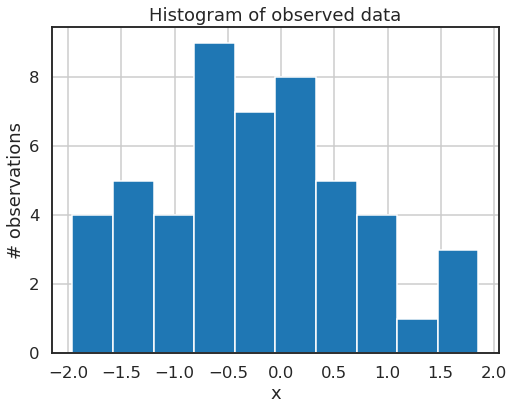

In [2]:
fig, ax = plt.subplots(figsize = (8, 6))
# sns.distplot(data, kde = False, ax = ax)
ax.hist(data)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations')
plt.grid()
plt.show()

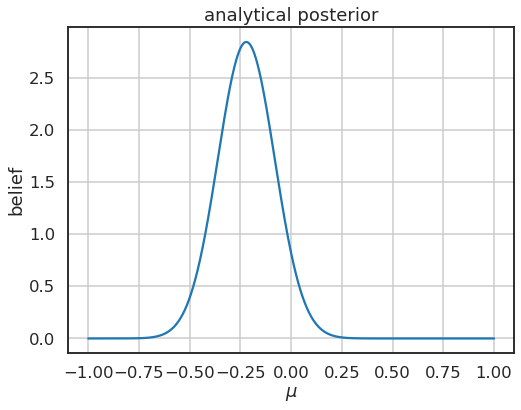

In [3]:
def posteriorCalc(data, mu_0, sigma_0):
    sigma = 1
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + sum(data) / sigma**2) \
                * (1 / sigma_0**2 + n / sigma**2)**-1
    sigma_post = (1 / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, sigma_post**0.5)
fig, ax = plt.subplots(figsize = (8, 6))
xs = np.linspace(-1, 1, 1000)
post_dist = posteriorCalc(data, 0, 1)
ax.plot(xs, post_dist.pdf(xs))
_ = ax.set(xlabel = '$\mu$', 
           ylabel = 'belief', 
           title = 'analytical posterior')
plt.grid()